In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy, AUC

import matplotlib.pyplot as plt
import app
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
NUM_EPOCHS = 20
BATCH_SIZE = 8
LEARN_RATE = 0.01

CLASS_MODE = "categorical"
COLOR_MODE = "grayscale"
TARGET_SIZE = (256,256)
BATCH_SIZE = 32

In [3]:
TRAIN_DATA_DIRECTORY = "Covid19-dataset/train"
TEST_DATA_DIRECTORY = "Covid19-dataset/test"

In [4]:
train_image_data_generator = ImageDataGenerator(rescale=1.0/255,
                                            zoom_range=0.2,
                                            rotation_range=15,
                                            width_shift_range=0.05,
                                            height_shift_range=0.05)

training_iterator = train_image_data_generator.flow_from_directory(TRAIN_DATA_DIRECTORY,
                                                                class_mode=CLASS_MODE,
                                                                color_mode=COLOR_MODE,
                                                                target_size=TARGET_SIZE,
                                                                batch_size=BATCH_SIZE)


test_image_data_generator = ImageDataGenerator(rescale=1.0/255)

test_iterator = test_image_data_generator.flow_from_directory(TEST_DATA_DIRECTORY,
                                                        class_mode=CLASS_MODE,
                                                        color_mode=COLOR_MODE,
                                                        target_size=TARGET_SIZE,
                                                        batch_size=BATCH_SIZE)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [8]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))
model.add(tf.keras.layers.Conv2D(12, 5, strides=3, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3,3)))
model.add(tf.keras.layers.Conv2D(10, 4, strides=2, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(8, 3, strides=1, activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(6, 2, strides=1, activation="relu"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3,activation="softmax"))

In [9]:
model.compile(
            optimizer = tf.keras.optimizers.Adam(learning_rate=LEARN_RATE),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
            )

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 84, 84, 12)        312       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 12)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 10)        1930      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 10)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           728       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 8)         

In [10]:
history = model.fit(
       training_iterator,
       steps_per_epoch = (training_iterator.samples)/BATCH_SIZE,
       epochs = NUM_EPOCHS,
       validation_data = test_iterator,
       validation_steps = (test_iterator.samples)/BATCH_SIZE
)

Epoch 1/20
7/7 [==============================] - 16s 2s/step - loss: 1.0934 - categorical_accuracy: 0.4064 - auc: 0.5498 - val_loss: 1.0969 - val_categorical_accuracy: 0.3939 - val_auc: 0.4823
Epoch 2/20
7/7 [==============================] - 14s 2s/step - loss: 1.0748 - categorical_accuracy: 0.4422 - auc: 0.5749 - val_loss: 1.0801 - val_categorical_accuracy: 0.3939 - val_auc: 0.6849
Epoch 3/20
7/7 [==============================] - 14s 2s/step - loss: 1.0535 - categorical_accuracy: 0.4462 - auc: 0.6745 - val_loss: 1.0185 - val_categorical_accuracy: 0.4848 - val_auc: 0.7110
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.9045 - categorical_accuracy: 0.6135 - auc: 0.7622 - val_loss: 0.8716 - val_categorical_accuracy: 0.6667 - val_auc: 0.7690
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.7693 - categorical_accuracy: 0.6215 - auc: 0.8414 - val_loss: 0.7695 - val_categorical_accuracy: 0.6667 - val_auc: 0.8317
Epoch 6/20
7/7 [==============

/var/folders/rq/t1zwhw110z107g7z9_lt036m0000gn/T/ipykernel_59653/833566034.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


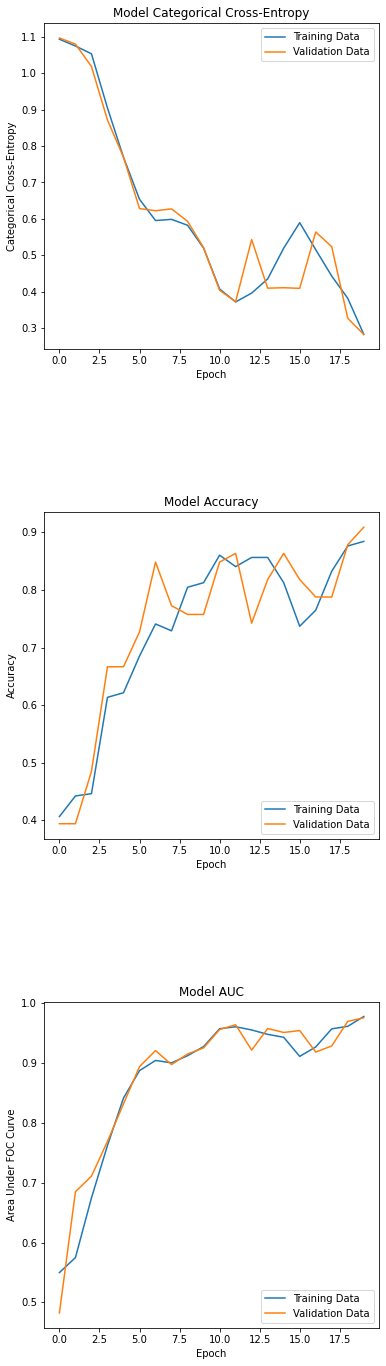

In [11]:
fig = plt.figure(figsize=(6,24))
fig.subplots_adjust(hspace=0.5)

ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model Categorical Cross-Entropy')
ax1.set_ylabel('Categorical Cross-Entropy')
ax1.set_xlabel('Epoch')
ax1.legend(['Training Data', 'Validation Data'], loc='upper right')

ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(history.history['categorical_accuracy'])
ax2.plot(history.history['val_categorical_accuracy'])
ax2.set_title('Model Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['Training Data', 'Validation Data'], loc='lower right')

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(history.history['auc'])
ax3.plot(history.history['val_auc'])
ax3.set_title('Model AUC')
ax3.set_ylabel('Area Under FOC Curve')
ax3.set_xlabel('Epoch')
ax3.legend(['Training Data', 'Validation Data'], loc='lower right')

fig.show()

In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

model_predictions = model.predict(test_iterator, steps=(test_iterator.samples)/BATCH_SIZE)

predicted_classes = np.argmax(model_predictions, axis=1)
true_classes = test_iterator.classes
class_labels = list(test_iterator.class_indices.keys())

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))   

print("Confusion Matrix:")
print(confusion_matrix(true_classes,predicted_classes, labels = [0,1,2]))

2/2 [==============================] - 2s 816ms/step       
Classification Report:
                 precision    recall  f1-score   support

          Covid       0.48      0.42      0.45        26
         Normal       0.38      0.40      0.39        20
Viral Pneumonia       0.27      0.30      0.29        20

       accuracy                           0.38        66
      macro avg       0.38      0.37      0.37        66
   weighted avg       0.39      0.38      0.38        66

Confusion Matrix:
[[11  8  7]
 [ 3  8  9]
 [ 9  5  6]]
